In [1]:
import geopandas as gp

In [2]:
x = gp.read_file('USDM_20001226.shp')

In [3]:
x

,OBJECTID,DM,Shape_Leng,Shape_Area,geometry
0,1,0,2.686353e+07,1.046713e+12,"MULTIPOLYGON (((-66.97864 18.03294, -67.01785 ..."
1,2,1,1.893427e+07,5.376535e+11,"MULTIPOLYGON (((-97.21750 26.00968, -97.21958 ..."
2,3,2,1.364888e+07,5.111618e+11,"MULTIPOLYGON (((-81.68743 25.89443, -81.69194 ..."
3,4,3,3.393412e+06,4.702333e+10,"MULTIPOLYGON (((-82.23736 26.80141, -82.23886 ..."
4,5,4,1.217147e+06,2.780677e+10,"MULTIPOLYGON (((-82.59624 27.82355, -82.59626 ..."


In [12]:
x.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
x.iloc[2]

OBJECTID                                                      3
DM                                                            2
Shape_Leng                                        13648877.1889
Shape_Area                                       511161774956.0
geometry      (POLYGON ((-81.68743445442284 25.8944291215133...
Name: 2, dtype: object

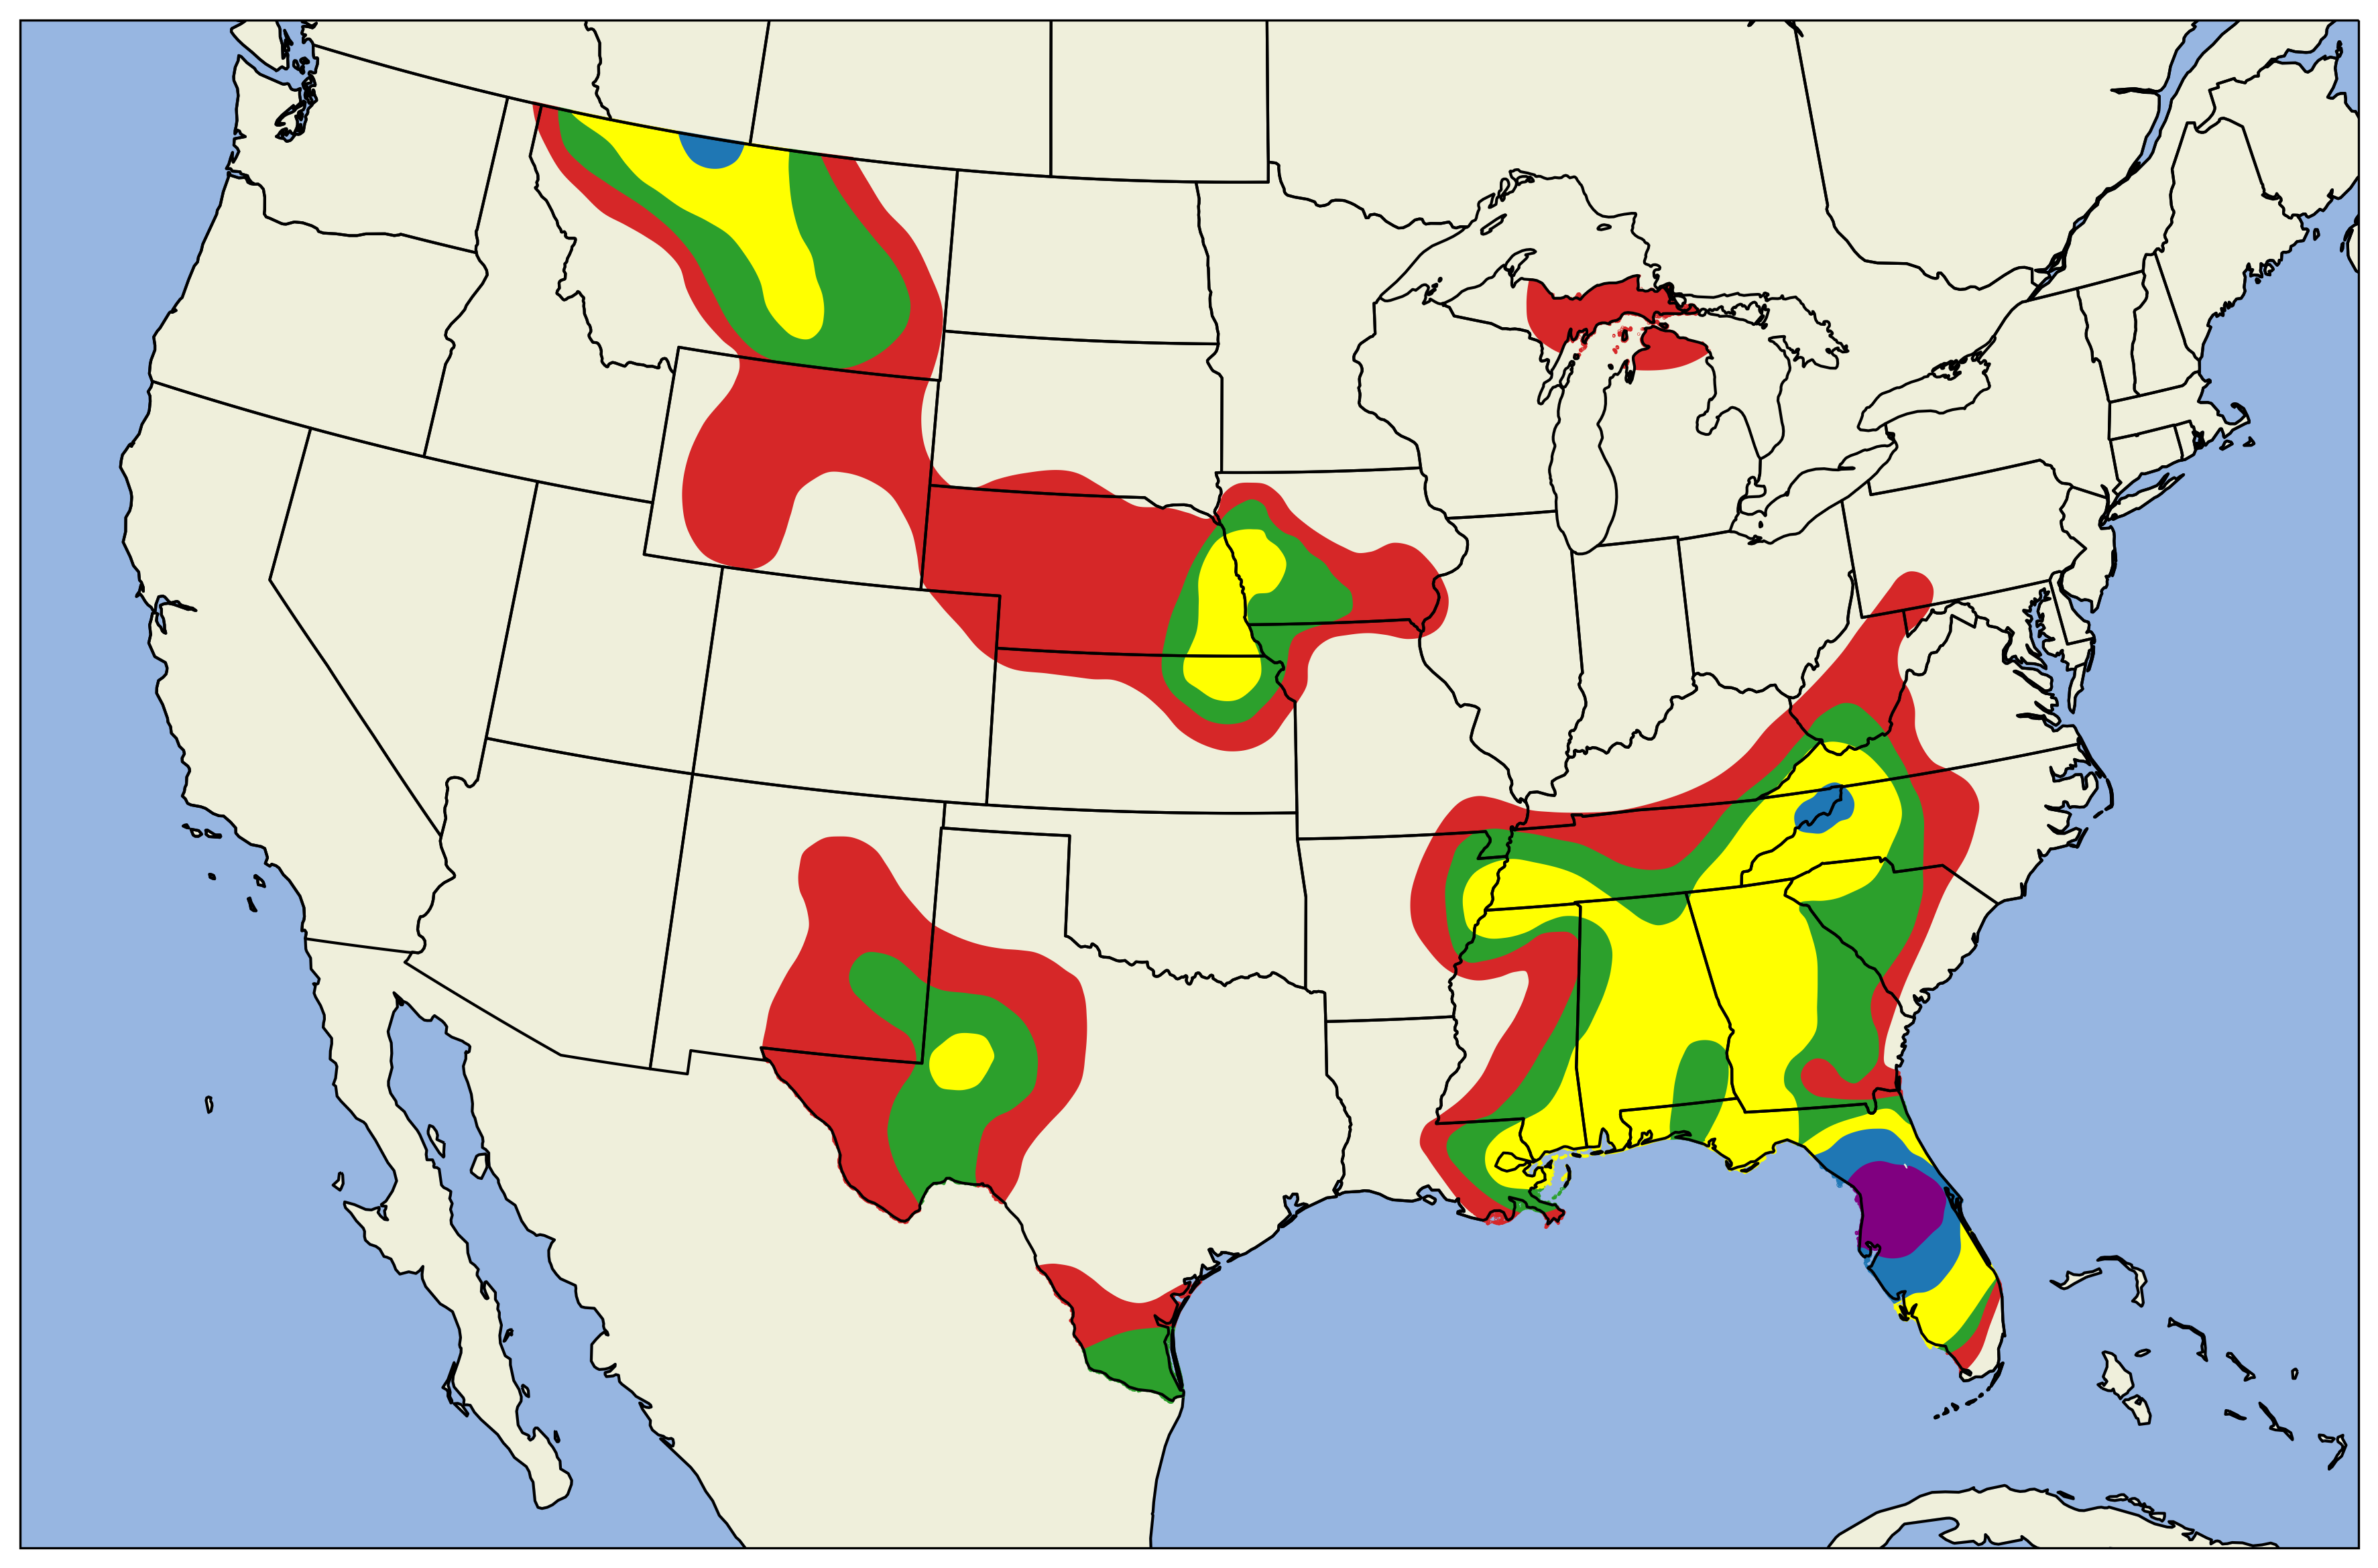

In [22]:
import matplotlib.pyplot as plt

# for creating the legend
import matplotlib.patches as mpatches

#cartopy coordinate reference system
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#changes typeface
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams['figure.dpi'] = 300


fig = plt.figure(figsize=(15,15)) #create a figure object, blank square on the screen
ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal()) #creates single plot for the blank square, states the coordinate system that all everything will be plotted with

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([-120, -74, 21, 50])
ax.coastlines() #adds coastlines
ax.add_feature(cfeature.STATES,zorder=2) #states
ax.add_feature(cfeature.LAND) #land
ax.add_feature(cfeature.OCEAN) #ocean
ax.add_geometries(x.iloc[0].geometry,crs=ccrs.PlateCarree(),color='tab:red') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries(x.iloc[1].geometry,crs=ccrs.PlateCarree(),color='tab:green') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries(x.iloc[2].geometry,crs=ccrs.PlateCarree(),color='yellow') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries(x.iloc[3].geometry,crs=ccrs.PlateCarree(),color='tab:blue') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color
ax.add_geometries(x.iloc[4].geometry,crs=ccrs.PlateCarree(),color='purple') #plots bear river, states what starting coordinate system for bear is (26912), picks plot color


# bearriver = mpatches.Patch(color='#2ca02c', label='Bear')#creates legend item, specifies color
fig.show()